In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np

realtor_data = "Resources/RealtorData.csv"
realtor_file_df = pd.read_csv(realtor_data, encoding="ISO-8859-1")
realtor_file_df


,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1048570,for_sale,5.0,4.0,0.14,Hollis,New York,11423.0,2574.0,11/8/2004,1175000.0
1048571,for_sale,7.0,4.0,0.09,Hollis,New York,11423.0,NaN,12/15/2021,1349000.0
1048572,for_sale,5.0,3.0,0.09,Hollis,New York,11423.0,NaN,7/18/2018,925000.0
1048573,for_sale,4.0,3.0,0.13,Hollis,New York,11423.0,NaN,3/12/2003,1350000.0


In [19]:
realtor_file_df.duplicated().sum()

926465

In [20]:
realtor_file_df.drop_duplicates()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1048521,for_sale,4.0,3.0,0.09,Rosedale,New York,11422.0,NaN,3/18/2002,849990.0
1048539,for_sale,6.0,5.0,0.09,Rosedale,New York,11422.0,2315.0,4/9/2021,1279000.0
1048543,for_sale,1.0,1.0,NaN,Hollis,New York,11423.0,NaN,2/11/2021,190000.0
1048558,for_sale,1.0,1.0,NaN,Hollis,New York,11423.0,NaN,NaN,179000.0


In [21]:
realtor_file_df['prev_sold_encoded'] = realtor_file_df['prev_sold_date'].map(lambda x: 'Yes' if pd.notna(x) else 'No')
realtor_file_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,No
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0,No
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0,No
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0,No
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0,No
...,...,...,...,...,...,...,...,...,...,...,...
1048570,for_sale,5.0,4.0,0.14,Hollis,New York,11423.0,2574.0,11/8/2004,1175000.0,Yes
1048571,for_sale,7.0,4.0,0.09,Hollis,New York,11423.0,NaN,12/15/2021,1349000.0,Yes
1048572,for_sale,5.0,3.0,0.09,Hollis,New York,11423.0,NaN,7/18/2018,925000.0,Yes
1048573,for_sale,4.0,3.0,0.13,Hollis,New York,11423.0,NaN,3/12/2003,1350000.0,Yes


In [22]:
realtor_file_df.fillna(0,inplace=True)

In [23]:
new_york_df = realtor_file_df[realtor_file_df['city'] == 'New York']
new_york_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
465089,for_sale,2.0,2.0,0.0,New York,New York,10021.0,0.0,0,1185000.0,No
465111,for_sale,12.0,14.0,0.0,New York,New York,10014.0,8528.0,0,29995000.0,No
465513,for_sale,2.0,2.0,0.0,New York,New York,10022.0,1425.0,0,895000.0,No
465515,for_sale,1.0,2.0,0.0,New York,New York,10005.0,1166.0,1/10/2014,985000.0,Yes
465516,for_sale,1.0,1.0,0.0,New York,New York,10065.0,761.0,8/18/2020,810000.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1047710,for_sale,1.0,1.0,0.0,New York,New York,10010.0,750.0,6/2/2016,1300000.0,Yes
1047729,for_sale,1.0,1.0,0.0,New York,New York,10025.0,0.0,10/31/2014,625000.0,Yes
1047753,for_sale,3.0,4.0,0.0,New York,New York,10016.0,2880.0,5/19/2017,5750000.0,Yes
1047842,for_sale,2.0,1.0,0.0,New York,New York,11368.0,0.0,1/10/2018,182000.0,Yes


In [24]:
new_york_df2 = new_york_df.copy()

## DISTRUBTION TABLES FOR NEW YORK CITY 

In [25]:
# Build DataFrame Bed v Count
bed_count_df = new_york_df2[["bed","price"]].groupby("bed",as_index=False).agg({"price":["mean","count"]}) 

In [26]:
bed_count_df.columns = ["bed", "avg_price", "count"]
bed_cpunt_df = bed_count_df.sort_values(by='bed', ascending=False)

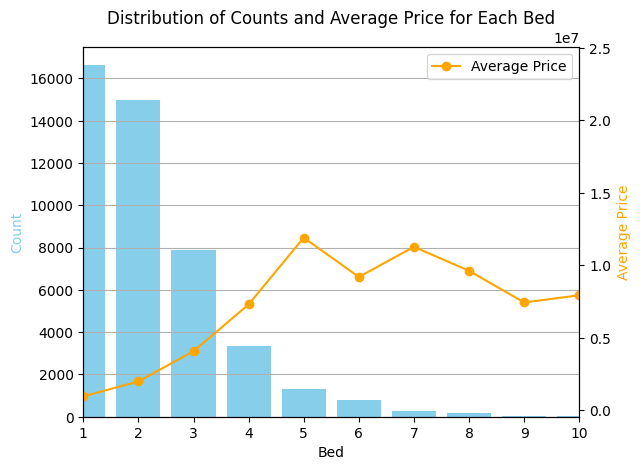

In [27]:
# Plotting Bed v Count and Avg Price
fig, ax1 = plt.subplots()

# Create bar plot for count
ax1.bar(bed_count_df['bed'], bed_count_df['count'], color='skyblue')
ax1.set_xlabel('Bed')
ax1.set_ylabel('Count', color='skyblue')
ax1.set_title('Distribution of Counts and Average Price for Each Bed')
ax1.set_xlim(1, 10)

# Add grid lines for count plot
ax1.grid(axis='y')

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()

# Plot the line graph for avg_price
ax2.plot(bed_count_df['bed'], bed_count_df['avg_price'], color='orange', marker='o', label='Average Price')
ax2.set_ylabel('Average Price', color='orange')

# Show legend for line plot
ax2.legend(loc='upper right')

plt.show()

In [28]:
# Build DataFrame Bed v Count
bath_count_df = new_york_df2[["bath","price"]].groupby("bath",as_index=False).agg({"price":["mean","count"]}) 

In [29]:
#Naming Columns, and sorting by Bath values 
bed_count_df.columns = ["bath", "avg_price", "count"]
bed_count_df = bed_count_df.sort_values(by='bath', ascending=False)

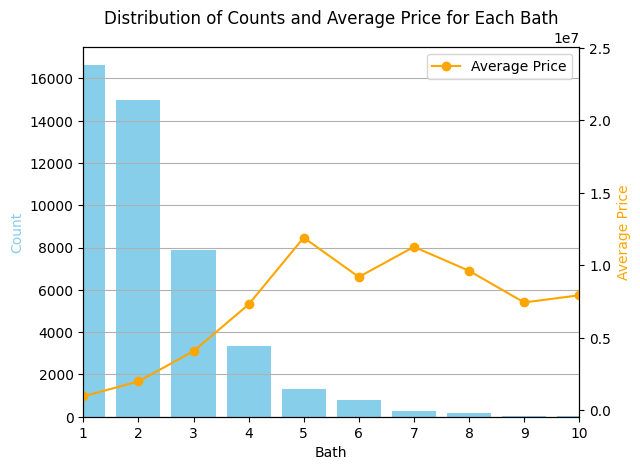

In [30]:
# Plotting DataFrame Bath v Count and Avg Price
fig, ax1 = plt.subplots()

# Create bar plot for count
ax1.bar(bed_count_df['bath'], bed_count_df['count'], color='skyblue')
ax1.set_xlabel('Bath')
ax1.set_ylabel('Count', color='skyblue')
ax1.set_title('Distribution of Counts and Average Price for Each Bath')
ax1.set_xlim(1, 10)

# Add grid lines for count plot
ax1.grid(axis='y')

# Create a secondary y-axis for the line plot
ax2 = ax1.twinx()

# Plot the line graph for avg_price
ax2.plot(bed_count_df['bath'], bed_count_df['avg_price'], color='orange', marker='o', label='Average Price')
ax2.set_ylabel('Average Price', color='orange')

# Show legend for line plot
ax2.legend(loc='upper right')

plt.show()

In [31]:
# Build DataFrame Bed v Count
house_count_df = new_york_df2[["house_size","price"]].groupby("house_size",as_index=False).agg({"price":["mean","count"]}) 
house_count_df

house_size         price       
                         mean  count
0           0.0  1.856163e+06  22255
1         199.0  1.990000e+05      1
2         289.0  3.600000e+05     21
3         300.0  4.131636e+05     11
4         325.0  2.850000e+05      4
...         ...           ...    ...
1497    15875.0  6.000000e+07      1
1498    21816.0  1.550000e+07      1
1499    22455.0  2.150000e+07      1
1500    40720.0  3.890000e+05     24
1501    61839.0  3.480000e+05      1

[1502 rows x 3 columns]

In [32]:
# Calculate the group number for every 500 sq ft
new_york_df2['group'] = np.ceil(new_york_df2['house_size'] / 500)

# Convert group numbers to integers
new_york_df2['group'] = new_york_df2['group'].astype(int)

# Print the updated DataFrame
new_york_df2

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded,group
465089,for_sale,2.0,2.0,0.0,New York,New York,10021.0,0.0,0,1185000.0,No,0
465111,for_sale,12.0,14.0,0.0,New York,New York,10014.0,8528.0,0,29995000.0,No,18
465513,for_sale,2.0,2.0,0.0,New York,New York,10022.0,1425.0,0,895000.0,No,3
465515,for_sale,1.0,2.0,0.0,New York,New York,10005.0,1166.0,1/10/2014,985000.0,Yes,3
465516,for_sale,1.0,1.0,0.0,New York,New York,10065.0,761.0,8/18/2020,810000.0,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1047710,for_sale,1.0,1.0,0.0,New York,New York,10010.0,750.0,6/2/2016,1300000.0,Yes,2
1047729,for_sale,1.0,1.0,0.0,New York,New York,10025.0,0.0,10/31/2014,625000.0,Yes,0
1047753,for_sale,3.0,4.0,0.0,New York,New York,10016.0,2880.0,5/19/2017,5750000.0,Yes,6
1047842,for_sale,2.0,1.0,0.0,New York,New York,11368.0,0.0,1/10/2018,182000.0,Yes,0


# Analysis for Bed v Count and Bath v Count
In New York City, the majority of homes feature one to two bedrooms, suggesting a common preference or design trend in residential construction. Interestingly, there appears to be a negative correlation between the number of bedrooms and the price of a home, with properties with more than five bedrooms losing value. A similar pattern appears with the number of bathrooms, indicating a possible impact on pricing. Another notable observation is the high number of house sizes between 1000 and 1500 square feet, indicating a standard or popular size for residential properties in the city.